In [1]:
import pandas as pd
import seaborn as sns
from pydataset import data
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import prepare as p
import wrangle as w
from env import get_db_url

alpha = 0.5

In [2]:
df = pd.read_sql('SELECT * FROM customers', get_db_url('telco_churn'))

In [3]:
raw_data = w.get_telco_data()

In [4]:
clean_data = w.prep_telco_data(raw_data)

In [5]:
train_df, validate_df, split_df = w.split_telco_data(clean_data)

##########################################################################################################

In [6]:
single_df = p.single_house(train_df)

In [ ]:
single_df.head()

In [7]:
dual_df = p.dual_house(train_df)

In [ ]:
dual_df.head()

In [8]:
family_df = p.family_house(train_df)

In [ ]:
family_df.head()

In [9]:
single_head_house_df = p.single_head_house(train_df)

In [ ]:
train_df.head()

### Single exploration

exploring the relationship between in-hand-services and churn among single households

- H_0: ihs of single households who churn >= ihs of single households who do not churn
- H_a: ihs of single households who churn < ihs of single households who do not churn

<AxesSubplot:>

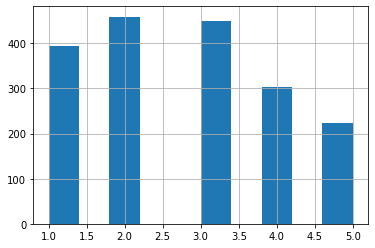

In [10]:
single_df.ihs.hist()

<AxesSubplot:>

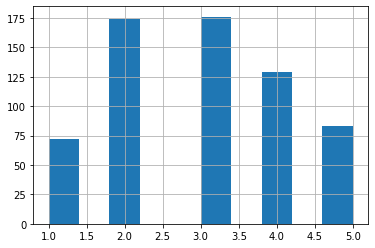

In [11]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ihs

churn_sample_single.hist()

In [12]:
alpha = 0.5

In [13]:
single_df.churn.value_counts(normalize = True)

No     0.653552
Yes    0.346448
Name: churn, dtype: float64

In [14]:

churn_sample_single = single_df[single_df.churn == 'Yes'].ihs
overall_mean_single = single_df.ihs.mean()

t, p = stats.ttest_1samp(churn_sample_single, overall_mean_single)

print(t, p/2, alpha)

4.863220784219245 7.294145688580764e-07 0.5


In [15]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


by rejecting the null hypothesis, we affirm that among single households, those who churn have less in-hand-services than those who do not churn.

#### here we are comparing out of sight services of churn and not churn among single households

- H_0: ooss of those who churn >= ooss of those who do not churn among single households
- H_a: ooss of those who churn < ooss of those who do not churn among single households

In [ ]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ooss
overall_mean_single = single_df.ooss.mean()

t, p = stats.ttest_1samp(churn_sample_single, overall_mean_single)

print(t, p/2, alpha)

In [ ]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

In [ ]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ooss

churn_sample_single.hist()

From this we can infer that people are more satisfied the more ooss they have

### Family Exploration

exploring the relationship between in-hand-services and churn among family households

- H_0 : ihs of family households who churn >= ihs of family households who do not churn
- H_a: ihs of family households who churn < ihs of family households who do not churn

In [ ]:
single_df.churn.value_counts()


<AxesSubplot:>

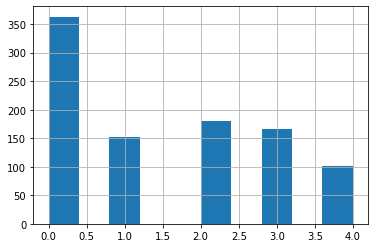

In [29]:
family_df.ooss.hist()

<AxesSubplot:>

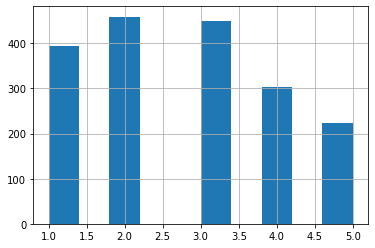

In [30]:
single_df.ihs.hist()

<AxesSubplot:>

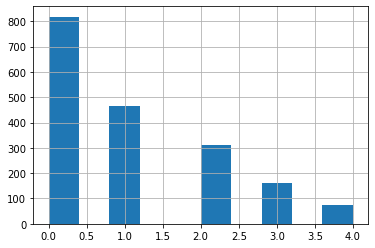

In [31]:
single_df.ooss.hist()

<AxesSubplot:>

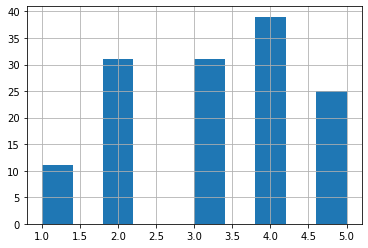

In [32]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ihs

churn_sample_family.hist()

In [33]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ihs
overall_mean_family = family_df.ihs.mean()

t, p = stats.ttest_1samp(churn_sample_family, overall_mean_family)

print(t, p/2, alpha)

4.2045001190478 2.3576048722902858e-05 0.5


In [34]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


by failing to reject the null hypothesis, we recognize there is no relationship between churn and ihs among families

<AxesSubplot:>

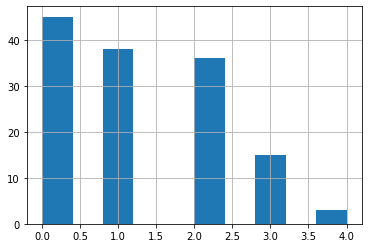

In [35]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ooss

churn_sample_family.hist()

people tend to be more satisfied with more ooss

###############################################################################################################


In [36]:
train_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet,online_security,...,family_house,single_head_house,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,ihs,ooss
3658,5170-PTRKA,Female,0,Yes,Yes,49,No,0,1,1,...,True,False,0,1,1,0,1,0,1,2
3865,5442-BXVND,Female,0,Yes,Yes,33,Yes,1,0,0,...,True,False,0,1,1,1,0,0,2,0
386,0570-BFQHT,Female,0,No,No,9,Yes,0,1,0,...,False,False,0,0,0,1,0,0,2,2
1204,1769-GRUIK,Female,0,No,No,18,Yes,0,1,0,...,False,False,0,0,0,1,1,0,2,0
4570,6439-PKTRR,Female,0,Yes,Yes,70,Yes,1,1,1,...,True,False,0,1,1,1,0,0,4,4


<AxesSubplot:>

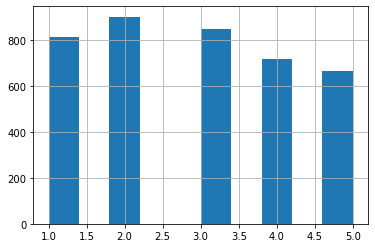

In [37]:
train_df.ihs.hist()

<AxesSubplot:>

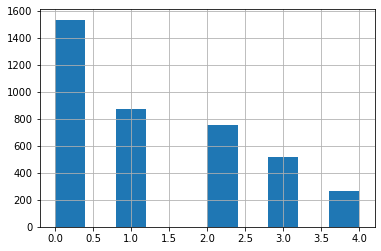

In [38]:
train_df.ooss.hist()

<AxesSubplot:>

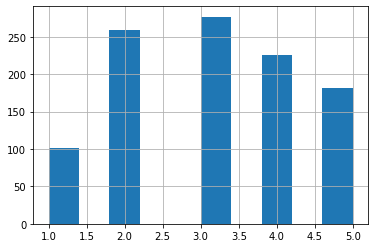

In [39]:
train_df[train_df.churn == 'Yes'].ihs.hist()

<AxesSubplot:>

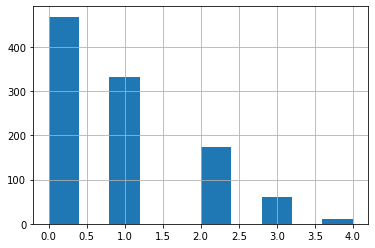

In [40]:
train_df[train_df.churn == 'Yes'].ooss.hist()

#### some chi-squared

In [55]:
observed = pd.crosstab(single_df.ooss, single_df.churn)
observed

churn,No,Yes
ooss,,
0,490,328
1,259,206
2,237,73
3,140,22
4,70,5


In [56]:
stats.chi2_contingency(observed)

(104.42554203507709,
 1.122787418074825e-21,
 4,
 array([[534.60546448, 283.39453552],
        [303.90163934, 161.09836066],
        [202.6010929 , 107.3989071 ],
        [105.87540984,  56.12459016],
        [ 49.01639344,  25.98360656]]))

In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [58]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[490 328]
 [259 206]
 [237  73]
 [140  22]
 [ 70   5]]

Expected
[[534 283]
 [303 161]
 [202 107]
 [105  56]
 [ 49  25]]

----
chi^2 = 104.4255
p     = 0.0000


#### considering monthly charges

In [ ]:
observed = pd.crosstab(family_df.charge_bins, family_df.ihs)
observed

In [ ]:
stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
observed = pd.crosstab(single_df.charge_bins, single_df.ihs)
observed

## baseline stats

In [18]:
single_df.churn.value_counts(normalize = True)

No     0.653552
Yes    0.346448
Name: churn, dtype: float64

In [19]:
family_df.churn.value_counts(normalize = True)

No     0.857588
Yes    0.142412
Name: churn, dtype: float64

In [20]:
dual_df.churn.value_counts(normalize = True)

No     0.748936
Yes    0.251064
Name: churn, dtype: float64

In [21]:
single_head_house_df.churn.value_counts(normalize = True)

No     0.815166
Yes    0.184834
Name: churn, dtype: float64

In [22]:
train_df.churn.value_counts(normalize = True)

No     0.73472
Yes    0.26528
Name: churn, dtype: float64

In [23]:
train_df.ooss.value_counts(normalize = True)

0    0.389297
1    0.221405
2    0.190464
3    0.131879
4    0.066954
Name: ooss, dtype: float64

In [24]:
family_df.ooss.value_counts(normalize = True)

0    0.377339
2    0.187110
3    0.172557
1    0.158004
4    0.104990
Name: ooss, dtype: float64

In [25]:
single_df.ooss.value_counts(normalize = True)

0    0.446995
1    0.254098
2    0.169399
3    0.088525
4    0.040984
Name: ooss, dtype: float64

In [26]:
dual_df.ooss.value_counts(normalize = True)

0    0.262766
2    0.246809
1    0.226596
3    0.175532
4    0.088298
Name: ooss, dtype: float64

In [27]:
single_head_house_df.ooss.value_counts(normalize = True)

0    0.507109
1    0.203791
2    0.137441
3    0.127962
4    0.023697
Name: ooss, dtype: float64

In [28]:
train_df.online_security.value_counts(normalize = True)

0    0.711387
1    0.288613
Name: online_security, dtype: float64

In [45]:
train_df.churn.value_counts(normalize = True)

No     0.73472
Yes    0.26528
Name: churn, dtype: float64

In [46]:
single_df.churn.value_counts(normalize = True)

No     0.653552
Yes    0.346448
Name: churn, dtype: float64

In [47]:
dual_df.churn.value_counts(normalize = True)

No     0.748936
Yes    0.251064
Name: churn, dtype: float64

In [48]:
single_head_house_df.churn.value_counts(normalize = True)

No     0.815166
Yes    0.184834
Name: churn, dtype: float64

In [49]:
family_df.churn.value_counts(normalize = True)

No     0.857588
Yes    0.142412
Name: churn, dtype: float64

In [50]:
train_df.ihs.value_counts(normalize = True)

2    0.228506
3    0.214557
1    0.206442
4    0.182095
5    0.168400
Name: ihs, dtype: float64

In [51]:
single_df.ihs.value_counts(normalize = True)

2    0.250820
3    0.245902
1    0.214754
4    0.166120
5    0.122404
Name: ihs, dtype: float64